In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# dataset - A, b

In [200]:
A = pd.read_csv('data_logsumexp_A.csv', header=None)
print(type(A))
A = np.array(A)
print(type(A))
print(A.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(300, 100)


In [201]:
b = pd.read_csv('data_logsumexp_b.csv', header=None)
b = np.array(b)
print(b.shape)

(300, 1)


# initial

In [202]:
m, n = A.shape
epsilon = 1e-15

In [203]:
# x0 = np.ones((n,1))
x0 = np.random.rand(n,1)

In [204]:
def f(x):
    return np.log(np.sum(np.exp(A @ x + b)))

In [216]:
def f_gradients(x):
    results = np.empty_like(x)
    for i in range(n):
        a = A[:,i]
        # result = np.sum(np.dot(np.exp(A @ x + b).reshape(m,),a))
        # result = (1/(np.sum(np.exp(A @ x + b)))) * result
        result = (1/(np.sum(np.exp(A @ x + b)))) * \
                np.sum(np.dot(np.exp(A @ x + b).reshape(m,),a))
        results[i] = [result]
    return results

# steepest-descent method

In [206]:
def steepest_descent(x, max_iterations, t):
    results = []
    results.append(f(x))
    k = 1
    while True:
        x = x + (t * -f_gradients(x))
        results.append(f(x))
        if k == max_iterations or abs(results[-1] - results[-2]) <= epsilon:
            break
        else:
            k += 1
    return results

# FISTA

In [207]:
def fista(x, max_iterations, t):
    results = []
    results.append(f(x))
    k = 1
    y = x
    gamma = 1
    while True:
        x_prev = x
        x = y - t * f_gradients(y)
        results.append(f(x))

        # for next iteration
        gamma_next = (1 + np.sqrt(1 + 4*(gamma ** 2)))/2
        y = x + (((gamma - 1)/gamma_next) * (x - x_prev))
        gamma = gamma_next
        if k == max_iterations or abs(results[-1] - results[-2]) <= epsilon:
            break
        else:
            k += 1
    return results

# find p* by steepest-descent method
- result from SD method, FISTA

In [208]:
t1 = 0.1
max_iterations = -1
f_SD_t1 = steepest_descent(x0,max_iterations,t1)
p_opt = min(f_SD_t1)
print('p* =',p_opt)

p* = 5.610898008665338


In [209]:
max_iterations = 300
f_FT_t1 = fista(x0,max_iterations,t1)
print(len(f_FT_t1))

301


# Plot - result

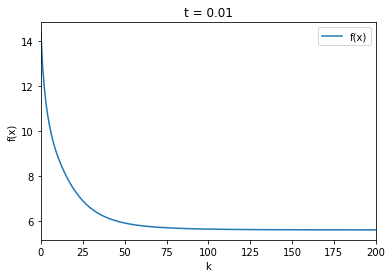

In [210]:
fig, ax = plt.subplots()
ax.plot([x for x in range(len(f_SD_t1))], f_SD_t1, label='f(x)')
ax.set_title("t = 0.01")
ax.set_xlabel("k")
ax.set_ylabel("f(x)")
ax.legend(loc='upper right')
ax.set_xlim(0,200)
plt.show()

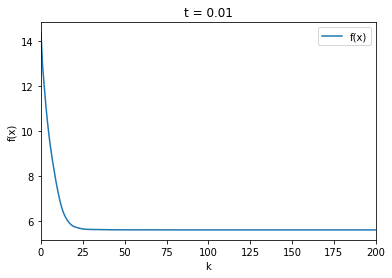

In [211]:
fig, ax = plt.subplots()
ax.plot([x for x in range(len(f_FT_t1))], f_FT_t1, label='f(x)')
ax.set_title("t = 0.01")
ax.set_xlabel("k")
ax.set_ylabel("f(x)")
ax.legend(loc='upper right')
ax.set_xlim(0,200)
plt.show()

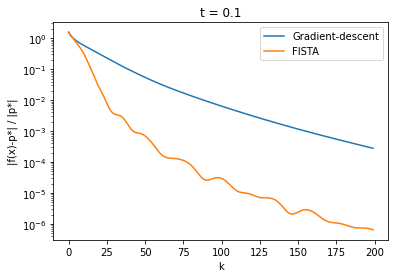

In [215]:
f_err_SD = [abs(f_curr - p_opt)/abs(p_opt) for f_curr in f_SD_t1[:200]]
f_err_FISTA = [abs(f_curr - p_opt)/abs(p_opt) for f_curr in f_FT_t1[:200]]

fig, ax = plt.subplots()
ax.plot([x for x in range(len(f_err_SD))], f_err_SD, label='Gradient-descent')
ax.plot([x for x in range(len(f_err_FISTA))], f_err_FISTA, label='FISTA')
ax.set_title("t = 0.1")
ax.set_xlabel("k")
ax.set_ylabel("|f(x)-p*| / |p*|")
ax.set_yscale('log')
ax.legend(loc='upper right')
plt.show()